In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
df=pd.read_csv('/placements.csv',encoding="latin1")

In [14]:
df.isnull().sum()

,0
cgpa,0
package,0


In [15]:
df

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57
...,...,...
195,6.93,2.46
196,5.89,2.57
197,7.21,3.24
198,7.63,3.96


In [16]:
x=df[['cgpa']]
y=df[['package']]

<Axes: xlabel='cgpa', ylabel='package'>

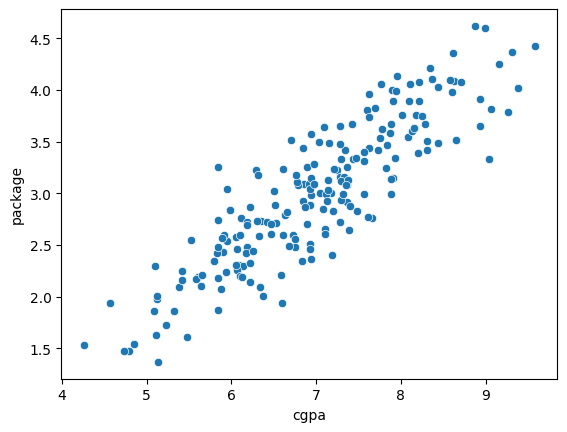

In [17]:
sns.scatterplot(df,x='cgpa',y='package')

In [18]:
df.corr()

,cgpa,package
cgpa,1.000000,0.880692
package,0.880692,1.000000


<Axes: >

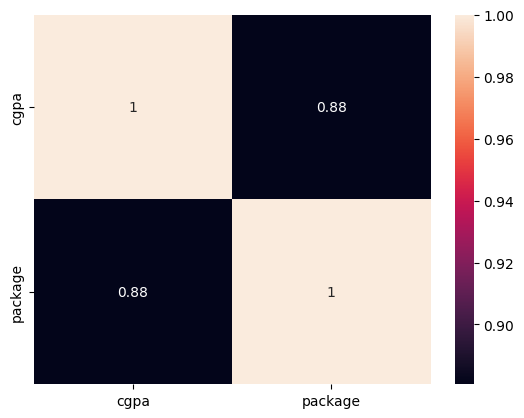

In [19]:
sns.heatmap(df.corr(),annot=True)

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
x_train,x_text,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=2)

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
lr=LinearRegression()

In [24]:
lr.fit(x_train,y_train)

LinearRegression()

In [25]:
m=lr.coef_

In [26]:
m

array([[0.55795197]])

In [27]:
c=lr.intercept_
c

array([-0.89611192])

In [28]:
y_pred_train=lr.predict(x_train)

In [29]:
y_pred_test=lr.predict(x_text)

In [30]:
from sklearn.metrics import mean_squared_error as mse, mean_absolute_error as mae, r2_score

In [31]:
r2_score(y_train,y_pred_train)

0.7733110961245032

In [32]:
r2_score(y_test,y_pred_test)

0.780730147510384

In [33]:
df1=pd.DataFrame()

In [34]:
df1['package']=y_test

In [35]:
df1['pred_test']=y_pred_test

In [36]:
df1

,package,pred_test
112,4.10,3.891116
29,3.49,3.093245
182,2.08,2.384646
199,2.33,2.574349
193,1.94,1.653729
85,1.48,1.776478
10,1.86,2.072193
54,3.09,2.931439
115,4.21,3.762787
35,2.87,2.937018


In [37]:
y_avg=df1['package'].mean()

In [38]:
df1['y-avg']=df1['package']-y_avg

In [39]:
df1['y-avg']

,y-avg
112,1.1355
29,0.5255
182,-0.8845
199,-0.6345
193,-1.0245
85,-1.4845
10,-1.1045
54,0.1255
115,1.2455
35,-0.0945


In [40]:
df1

,package,pred_test,y-avg
112,4.10,3.891116,1.1355
29,3.49,3.093245,0.5255
182,2.08,2.384646,-0.8845
199,2.33,2.574349,-0.6345
193,1.94,1.653729,-1.0245
85,1.48,1.776478,-1.4845
10,1.86,2.072193,-1.1045
54,3.09,2.931439,0.1255
115,4.21,3.762787,1.2455
35,2.87,2.937018,-0.0945


In [42]:
 df1['y-avg_sq']=df1['y-avg']**2

In [43]:
df1

,package,pred_test,y-avg,y-avg_sq
112,4.10,3.891116,1.1355,1.28936
29,3.49,3.093245,0.5255,0.27615
182,2.08,2.384646,-0.8845,0.78234
199,2.33,2.574349,-0.6345,0.40259
193,1.94,1.653729,-1.0245,1.04960
85,1.48,1.776478,-1.4845,2.20374
10,1.86,2.072193,-1.1045,1.21992
54,3.09,2.931439,0.1255,0.01575
115,4.21,3.762787,1.2455,1.55127
35,2.87,2.937018,-0.0945,0.00893


In [44]:
df1['y-avg_sq'].sum()

22.12659

In [48]:
df1['rss']=(df1['package']-df1["pred_test"])**2

In [49]:
df1

,package,pred_test,y-avg,y-avg_sq,rss
112,4.10,3.891116,1.1355,1.28936,0.043633
29,3.49,3.093245,0.5255,0.27615,0.157415
182,2.08,2.384646,-0.8845,0.78234,0.092809
199,2.33,2.574349,-0.6345,0.40259,0.059707
193,1.94,1.653729,-1.0245,1.04960,0.081951
85,1.48,1.776478,-1.4845,2.20374,0.087899
10,1.86,2.072193,-1.1045,1.21992,0.045026
54,3.09,2.931439,0.1255,0.01575,0.025142
115,4.21,3.762787,1.2455,1.55127,0.199999
35,2.87,2.937018,-0.0945,0.00893,0.004491


In [64]:
rss= df1['rss'].sum()

In [65]:
tss=df1['y-avg_sq'].sum()

In [66]:
1-(rss/tss)

0.780730147510384

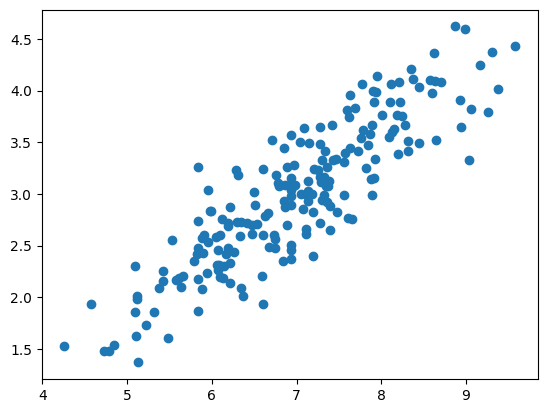

In [67]:
plt.scatter(df['cgpa'],df['package'])

## LINEAR REGRESSION LINE

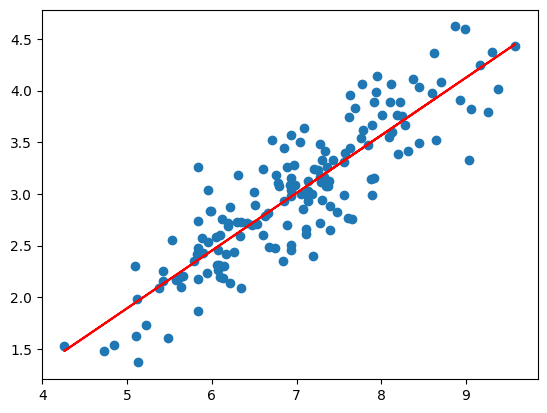

In [70]:
plt.scatter(x_train['cgpa'],y_train['package'])
plt.plot(x_train['cgpa'],y_pred_train,color='red')